In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
#now lets count the NaNs
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
#now we want to get some basci statistics for this
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
#now let's get the number of rows and columns
print("Number of Rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of Rows: 3276
Number of columns: 10


<AxesSubplot:>

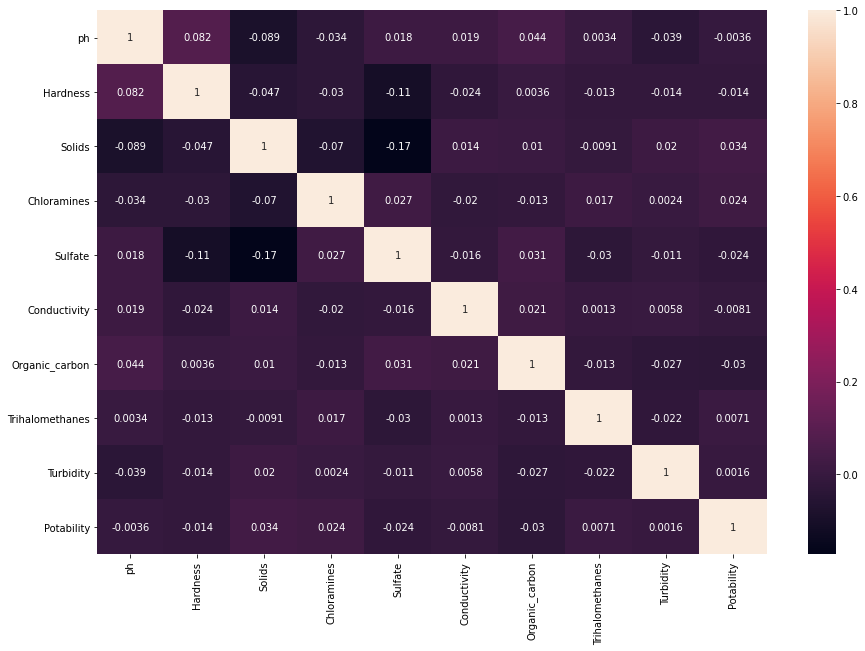

In [6]:
#now we want to make a heatmap
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)

#the annot puts in the values

In [7]:
#now lets fillna 
df['ph'].fillna(value = df['ph'].mean(), inplace = True)
df['Sulfate'].fillna(value = df['Sulfate'], inplace = True)
df['Trihalomethanes'].fillna(value = df['Trihalomethanes'].mean(), inplace = True)
df['Sulfate'].fillna(value = df['Sulfate'].mean(), inplace = True)

In [8]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
#check and see if there is any null values, looks like there is except for sulfate, which I don't think we are going to use
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [10]:
#now we want to split up the values using the 
X = df.iloc[:, :9]
Y = df.iloc[:, -1]

In [11]:
#now use train test split to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)

In [12]:
#now they are going to make random forest classifier
from sklearn.ensemble import RandomForestClassifier

#make the object
clf = RandomForestClassifier(n_estimators = 500)

#then fit the data
clf.fit(X_train, y_train)

#then predict
y_pred = clf.predict(X_test)

In [13]:
#now let's look at results
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))

Accuracy: 0.6753048780487805
Precision: 0.6953125


In [14]:
#then they are going to use a suport vector machine
from sklearn import svm

#then make the variable and set the mode
cls = svm.SVC(kernel = "linear")

#then we want to fit the model
cls.fit(X_train, y_train)

#then we want to get our predictions
pred = cls.predict(X_test)

In [15]:
#then lets get the results for that
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))

Accuracy: 0.6753048780487805
Precision: 0.6953125
